In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import tqdm

In [2]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('datasets/SatisfactionClients/trustpilot_comments.csv', index_col=0, sep=';')
df.head(50)

,note,commentaire,pays,date
0,5,"Bravo pour Ubaldi pour sa prévision exacte de disponibilité de l'appareil. Livraison avec vérification de l'état de l appareil avec transporteur.Le seche-linge consomme peu ( 0,6 kwh mesuré en moyenne / cycle ) !! Pratique qd il pleut en permanence pdt plusieurs semaines ! Le seul truc, bac à condensats (eau) à vider, pas d'évacuation directe mais si c est pour optimiser la conso ça va 🙂",FR,2023-11-28 19:32:42
1,5,"J'ai pu prendre le temps de bien comparer les différents modèles pour mes achats électroménagers et TV. j'ai pris le temps de comparer même modèle sur les autres sites et en magasin. finalement ce site est le plus rentable au niveau achat même produit même marque, de plus un petit rabais c'est ce qui m'a décidé et seulement 5 jours attente livraison et un dimanche trop cool",FR,2023-11-28 13:38:03
2,5,"Cela fait la dixième fois que je passe par Ubaldi, cela fait 8 ans que j'achète mon électroménager chez eux. Prix canon, timing de livraison respecté, créneaux de livraison au choix. Pour une livraison le samedi ou retardée (si vous devez finir un chantier), ils sont super souples et s'adaptent: il faut les contacter via le service client avant de passer la commande.",FR,2023-11-27 16:10:06
3,5,"Site très sérieux: tout s'est très bien déroulé de la commande prise en ligne jusqu'à la livraison au domicile de ma hotte aspirante Respect des délais, respect de la marchandise envoyée bien protégée avec une société de livraison au top :)",FR,2023-11-28 13:22:25
4,5,"Ubaldi est génial, les prix pratiqués sont canons et le service est au top. Jamais eu de problème, que de très bonnes expériences. Un grand merci à Stephen grâce à qui je me suis délesté de plus de 1000€ ! Plus sérieusement, un accueil téléphonique impeccable et un suivi aux petits oignons. Je le remercie encore une fois pour sa gentillesse et son service irréprochable.",FR,2023-11-27 19:02:02
5,5,Bon suivi de commande et équipe à l’écoute … Un peu surprise que les appareils neufs soient testés avant d’être livré - m’indique le vendeur - ( lave linge et lave vaisselle)Bonne expérience et fidélité assurée.,FR,2023-11-28 11:22:57
6,5,Nous avons commandé notre téléviseur chez Ubaldi et l'avons reçu très rapidement. Le suivi de la commande était précis et nous avons reçu notre produit en bonne état et bien protégé.Je recommande.,FR,2023-11-28 12:13:20
7,5,"Très satisfait des produits, délai de livraison et l'horaire respectés.Comme demandé à la commande 2 livreurs étaient présents. Ils prennent le temps de déballer et de contrôler les articles.",FR,2023-11-28 13:51:51
8,5,"Lave linge séchant livré avec beaucoup de soins par 2 livreurs très gentils et pros ! Livraison prévue en temps et en heure ( horaire de livraison suivie en live via le lien envoyé par sms, via la société VIR).La machine marche parfaitement pour le moment 🤞🤞🤞Très contente pour mon 1er achat sur Ubaldi.",FR,2023-11-27 13:50:44
9,4,Tu s’est bien passé malheureusement je m’en suis aperçu après il y a eu 1 accroc et 1 rayure sur ma porte alu de mon entrée en haut au passage du frigo.,FR,2023-11-28 12:48:18


In [5]:
df.drop(['pays', 'date'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272301 entries, 0 to 272300
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   note         272301 non-null  int64 
 1   commentaire  272301 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


In [9]:
df = df[df['commentaire'].isna()==False]

In [11]:
df.isna().sum()

note           0
commentaire    0
dtype: int64

### Chargement des stopswords

In [12]:
# chargement de la bibliothèque de stopwords et de tokenisation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import PunktSentenceTokenizer

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t.fourtouill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# chargement des listes stopwords pour les 3 langues principales 
stop_words_french = stopwords.words('french')
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')

In [15]:
# création d'une stopwords regroupant les 3 langues
stop_words = stop_words_french + stop_words_english + stop_words_spanish

### retraitement des commentaires et titres 

In [16]:
def commentaire_filtering(txt, stop_words):
    new_txt = ""
    tokenizer = RegexpTokenizer("[a-zA-Zéèëãñ\']{3,}")
    tokens = tokenizer.tokenize(txt.lower())
    for word in tokens:
        if word not in stop_words:
            new_txt += str(word) + " "
    return new_txt

In [17]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
from tqdm.notebook import tqdm
tqdm.pandas()
t0 = time()
df['new_commentaire'] = df['commentaire'].progress_apply(lambda x : commentaire_filtering(str(x), stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

  0%|          | 0/272301 [00:00<?, ?it/s]

le temps de calcul est de 49.43


In [18]:
df['note'].value_counts()

5    154028
1     48831
4     43544
3     15722
2     10176
Name: note, dtype: int64

In [19]:
new_df = df.drop(columns=['commentaire']).rename(columns={'new_commentaire' : 'commentaire'})

In [20]:
new_df.head(3)

,note,commentaire
0,5,bravo ubaldi prévision exacte disponibilité l'appareil livraison vérification l'état appareil transporteur seche linge consomme peu kwh mesuré moyenne cycle pratique pleut permanence pdt plusieurs semaines seul truc bac condensats eau vider d'évacuation directe optimiser conso
1,5,j'ai prendre temps bien comparer différents modèles achats électroménagers j'ai pris temps comparer modèle autres sites magasin finalement site plus rentable niveau achat produit marque plus petit rabais c'est m'a décidé seulement jours attente livraison dimanche trop cool
2,5,cela fait dixième fois passe ubaldi cela fait ans j'achète électroménager chez prix canon timing livraison respecté créneaux livraison choix livraison samedi retardée devez finir chantier super souples s'adaptent faut contacter via service client avant passer commande


### Enregistrement du dataset

In [21]:
new_df.to_csv('datasets/SatisfactionClients/cdiscount2.csv', index=False)

### Séparation en 2 : positif et négatif

In [22]:
new_df2 = new_df[new_df['note']!=3]
new_df2['note'] = new_df2['note'].replace([1, 2, 4, 5], [0, 0, 1, 1])
new_df2.head(3)

C:\Users\TB84A~1.FOU\AppData\Local\Temp/ipykernel_20616/194625483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['note'] = new_df2['note'].replace([1, 2, 4, 5], [0, 0, 1, 1])


,note,commentaire
0,1,bravo ubaldi prévision exacte disponibilité l'appareil livraison vérification l'état appareil transporteur seche linge consomme peu kwh mesuré moyenne cycle pratique pleut permanence pdt plusieurs semaines seul truc bac condensats eau vider d'évacuation directe optimiser conso
1,1,j'ai prendre temps bien comparer différents modèles achats électroménagers j'ai pris temps comparer modèle autres sites magasin finalement site plus rentable niveau achat produit marque plus petit rabais c'est m'a décidé seulement jours attente livraison dimanche trop cool
2,1,cela fait dixième fois passe ubaldi cela fait ans j'achète électroménager chez prix canon timing livraison respecté créneaux livraison choix livraison samedi retardée devez finir chantier super souples s'adaptent faut contacter via service client avant passer commande


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


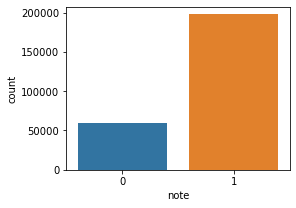

In [23]:
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.countplot(new_df2['note'])
plt.show();

In [24]:
new_df2.to_csv('datasets/SatisfactionClients/cdiscount_0_1.csv', index=False)

In [25]:
new_df['note'].value_counts()

5    154028
1     48831
4     43544
3     15722
2     10176
Name: note, dtype: int64

In [26]:
new_df2['note'].value_counts()

1    197572
0     59007
Name: note, dtype: int64

### Wordcloud

In [27]:
from PIL import Image
from wordcloud import WordCloud

In [28]:
new_df2[new_df2['note']==0]

,note,commentaire
14,0,chaises livrées carton sans défaut apparent certes fois déballées chaises tellement tassées carton mousse accoudoirs totalement écrasées contact pris lendemain service client veut rien entendre demande prendre charge frais retours minimum payer parce qu'on s'est fait refiler marchandises mées inadmissible
15,0,produit ajouté panier moins clic payer via paypal débités explication site prix rafraichit continuellement lorsque cliquez valider paiement belle technique voleur
22,0,super conseil part florian trés bon site tous gros achats font ubaldi
48,0,produit ajouté panier moins clic payer via paypal débités explication site prix rafraichit continuellement lorsque cliquez valider paiement belle technique voleur
107,0,prix frigo sélectionné matin augmenté soir lorsque retournés panier sans aucune intervention part ceci quand appelé numéro tél réponse
...,...,...
272296,0,beaucoup gens payent grosses n'ont livraison sait gérant fait l'argent clients attente colis pourtant validé comme quoi problème résolu fait tourner rond téléphonant numéro surtaxé conseil commandez plus cite frauduleux personnellement j'ai euros vent
272297,0,article commandé puis mail validation jour délai livraison estimé tard deux jours après mail numéro colissimo faux non reconnu laposte depuis silence radio trois jours après fin fourchette livraison seul surtaxé joindre cdiscount tous autres moyens réclamation neutralisés
272298,0,commande canapé recois délais probleme l'assise comporte accroc sav propose reprise remboursement sous jours jours plus tard recois mail propose geste commercial garde canapé abimé évidemment rappelle sav refuser confirme l'enlèvement canapé sous jours cette fois ème appel sav reste sans nouvelles d'eux après delai cette fois c'est bonne enfin conseiller dit n'est normal d'appeler autant fois probleme réglé transporteur prend donc rdv venir chercher colis finalement m'apprend cours nième appel n'étais secteur transporteur donc n'a daigné venir jusque chez j'attends donc après semaines qu'on vienne demain récupérer canapé encombre salon m'emp che m'équiper d'un nouveau toujours remboursée bref évitez cdiscount priez jamais avoir affaire sav sous traitants cette incompétence inadmissible
272299,0,commandé glacière électrique cdiscount l'appareil fonctionne réception ventilateur tourne glacière refroidi n'ayant testé avant l'emmener vacances dépassé jours demander remplacement remboursement sav fait balader d'un service l'autre n'a rien voulu savoir fin seule solution contacter sav mobicool l'on fait attend réponse mobicool donc très mécontent produit sav cdiscount commanderai plus chez car cas problème c'est vraiment galère amazon trouve toujours solution


In [29]:
text_commentaires_negatifs = ''
for comment_negatif in new_df2['commentaire'][new_df2['note']==0]:
    text_commentaires_negatifs += str(comment_negatif)
    
text_commentaires_positifs = ''
for comment_positif in new_df2['commentaire'][new_df2['note']==1]:
    text_commentaires_positifs += str(comment_positif)

In [30]:
def plot_word_cloud(text, masque, background_color= "black", max_words=100, stopwords=stop_words):
    # Définir un masque
    mask_coloring =  np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc= WordCloud(background_color=background_color, max_words=max_words, 
                 stopwords=stop_words, mask= mask_coloring, 
                 max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()
    cloud = wc.to_file('cloud.png')

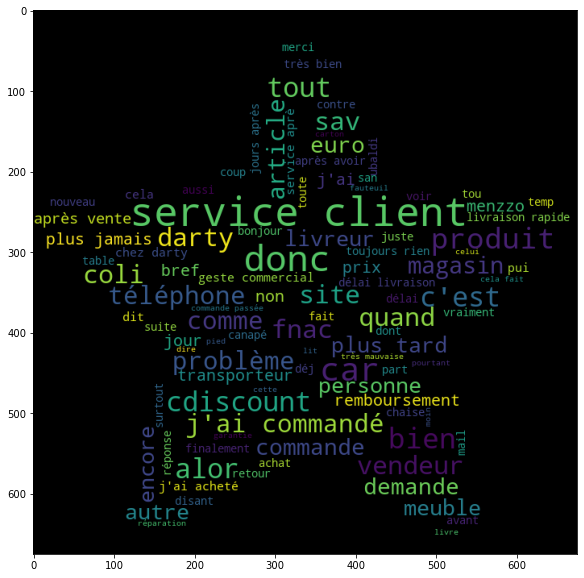

In [31]:
plot_word_cloud(text_commentaires_negatifs, "images/star6.jpg")

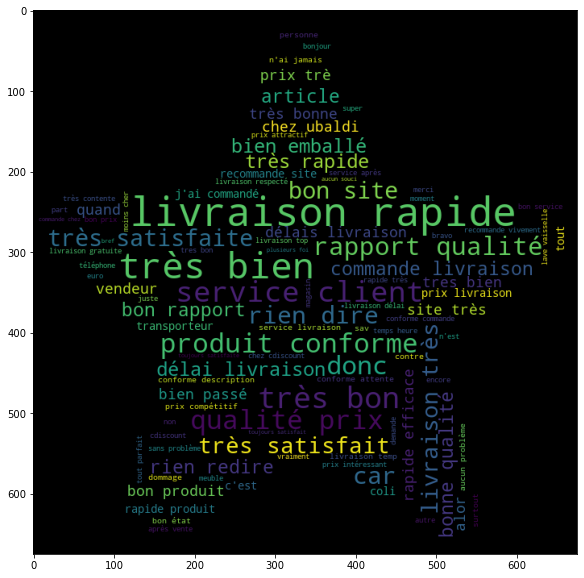

In [32]:
plot_word_cloud(text_commentaires_positifs, "images/star6.jpg")